In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("prep.csv")
df = pd.get_dummies(df, drop_first=True)

In [3]:
df.head(3)

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.0,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,False,False,False,False,False,False,True,True,False,True
1,3.0,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,True,False,False,False,False,False,True,False,False,True
2,4.0,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,True,False,False,False,False,False,True,False,False,True


In [4]:
from sklearn.feature_selection import SequentialFeatureSelector

def backward_select_features(X, y, estimator, k_features, cv=5):
    sbs = SequentialFeatureSelector(estimator, n_features_to_select=k_features, direction='backward',cv=cv, n_jobs=-1)
    sbs.fit(X, y)
    selected_features = X.columns[sbs.get_support()]
    return X[selected_features]

In [5]:
X = df.drop("classification_yes", axis=1)
y = df["classification_yes"]

# Use Logistic Regression as base estimator for feature selection
X_selected = backward_select_features(X, y, LogisticRegression(max_iter=1000), k_features=5)

# Split and scale
def split_scalar(indep_X, dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.25, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_scalar(X_selected, y)

In [6]:
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return classifier, acc, report, cm

In [7]:
# Store accuracy for each model
accuracies = {}

models = {
    "Logistic": LogisticRegression(max_iter=1000),
    "SVM_Linear": SVC(kernel='linear'),
    "SVM_RBF": SVC(kernel='rbf'),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    clf, acc, report, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    # print(report)  # Optional

# Convert to DataFrame
result_df = pd.DataFrame([accuracies], index=["ForwardSelection"])
print("\nModel Accuracy Comparison:\n")
print(result_df)


Logistic Accuracy: 0.9700
SVM_Linear Accuracy: 0.9700
SVM_RBF Accuracy: 0.9800
KNN Accuracy: 0.9800
NaiveBayes Accuracy: 0.9000
DecisionTree Accuracy: 0.9800
RandomForest Accuracy: 0.9900

Model Accuracy Comparison:

                  Logistic  SVM_Linear  SVM_RBF   KNN  NaiveBayes  \
ForwardSelection      0.97        0.97     0.98  0.98         0.9   

                  DecisionTree  RandomForest  
ForwardSelection          0.98          0.99  


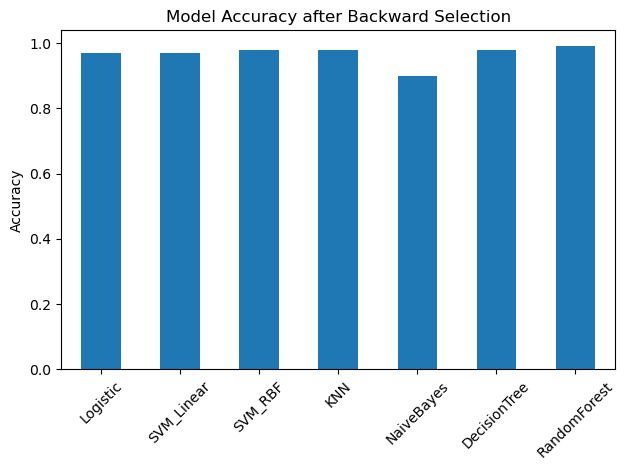

In [8]:
result_df.T.plot(kind='bar', legend=False)
plt.title("Model Accuracy after Backward Selection")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
df.columns

Index(['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv',
       'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_yes', 'pe_yes', 'ane_yes', 'classification_yes'],
      dtype='object')

In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
estimator = LogisticRegression(max_iter=5000,solver='saga')
sbs = SequentialFeatureSelector(estimator, n_features_to_select=5, direction='backward')
sbs.fit(X_scaled, y)

selected_feature_names = X.columns[sbs.get_support()]
print("Selected features:", list(selected_feature_names))

Selected features: ['hrmo', 'rc', 'sg_c', 'sg_d', 'htn_yes']
